In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px              ### To create interactive plots in python
import chart_studio
username ='janice.gbedemah'              ### An account needs to be created online to retrieve API keys
api_key = '7fuMphA2ExbPtpp9j3Bv'
chart_studio.tools.set_credentials_file(username=username,api_key=api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls

In [2]:
alberta_data = {'address':[], 'bedroom': [], 'bathroom':[], 'price':[]}
ontario_data = {'address':[], 'bedroom': [], 'bathroom':[], 'price':[]}
BC_data = {'address':[], 'bedroom': [], 'bathroom':[], 'price':[]}

In [3]:
## SCRAPING LISTINGS IN ALBERTA
for i in range(1,54):         ## TO loop through all the url pages from page 1 to 53
    url='https://apartmentlove.com/apartments-for-rent/alberta/canada/apartment/page'+str(i)
    page = requests.get(url) ## requesting to have access/connection to that page from the url
    soup = BeautifulSoup(page.content, 'html.parser') ## used to parse the html imformation from that page
    lists = soup.find_all('div', class_="property-details")## The parent class for all the information for each listing
    for list in lists:
        address = list.find('div', class_='property-details-heading').h3.a.text.replace("\n"," ")
        bedroom = list.find('ul', class_='d-flex').li.text.replace("\n"," ")
        bathroom = list.find('i', class_='bath-icon').next_sibling ## to extract the first string/text next to a tag/element 
        price = list.find('span', class_='price-text').text.replace("\n"," ")
        if address:
            alberta_data['address'].append(address)
        if bedroom:
            alberta_data['bedroom'].append(bedroom)
        if bathroom:
            alberta_data['bathroom'].append(bathroom)
        if price:
            alberta_data['price'].append(price) 
alberta = pd.DataFrame(alberta_data)
alberta.head(5)

,address,bedroom,bathroom,price
0,618 5 Avenue ...,1 Bed,1 Bath,"$1,399 CA..."
1,"9721 92 Ave.,...",1 Bed,1 Bath,$999 CAD ...
2,10717 107 Str...,Studio,1 Bath,$699 CAD ...
3,6707 Elbow Dr...,Studio,1 Bath,"$1,050 CA..."
4,3011 James Mo...,2 Beds,2 Baths,"$1,429 CA..."


In [5]:
## SCRAPING LISTINGS IN ONTARIO
for j in range(1,9):
    url2 = 'https://apartmentlove.com/apartments-for-rent/ontario/canada/apartment/page'+str(j)
    page2 = requests.get(url2)
    soup2 = BeautifulSoup(page2.content, "html.parser")
    lists2 = soup2.find_all('div', class_="property-details")
    for list in lists2:
        address2 = list.find('div', class_='property-details-heading').h3.a.text.replace("\n"," ")
        bedroom2 = list.find('ul', class_='d-flex').li.text.replace("\n"," ")
        bathroom2= list.find('i', class_='bath-icon').next_sibling ## to extract the first string/text next to a tag/element 
        price2 = list.find('span', class_='price-text').text.replace("\n"," ")
        if address2:
            ontario_data['address'].append(address2)
        if bedroom:
            ontario_data['bedroom'].append(bedroom2)
        if bathroom:
            ontario_data['bathroom'].append(bathroom2)
        if price:
            ontario_data['price'].append(price2) 
ontario = pd.DataFrame(ontario_data)
ontario.head(5)

,address,bedroom,bathroom,price
0,185 Lyon Stre...,1 Bed,1 Bath,"$1,900 CA..."
1,50 Prince Art...,1 Bed,1 Bath,"$1,800 CA..."
2,2 Quebec Stre...,1 Bed,1 Bath,"$1,580 CA..."
3,"Klaskamp, Han...",1 Bed,1 Bath,$980 CAD ...
4,60 Conway Dr....,1 Bed,1 Bath,"$1,359 CA..."


In [6]:
ontario.shape

(156, 4)

In [7]:
## SCRAPING LISTINGS IN BRITISH COLUMBIA
for k in range(1,7):
    url3 = 'https://apartmentlove.com/apartments-for-rent/british-columbia/canada/apartment/page'+str(k)
    page3 = requests.get(url3)
    soup3 = BeautifulSoup(page3.content, "html.parser")
    lists3 = soup3.find_all('div', class_="property-details")
    for list in lists3:
        address3 = list.find('div', class_='property-details-heading').h3.a.text.replace("\n"," ")
        bedroom3 = list.find('ul', class_='d-flex').li.text.replace("\n"," ")
        bathroom3= list.find('i', class_='bath-icon').next_sibling ## to extract the first string/text next to a tag/element 
        price3 = list.find('span', class_='price-text').text.replace("\n"," ")
        if address3:
            BC_data['address'].append(address3)
        if bedroom:
            BC_data['bedroom'].append(bedroom3)
        if bathroom:
            BC_data['bathroom'].append(bathroom3)
        if price:
            BC_data['price'].append(price3) 
BC = pd.DataFrame(BC_data)
BC.head(5)

,address,bedroom,bathroom,price
0,610 Granville...,1 Bed,1 Bath,"$1,650 CA..."
1,828 Howe Stre...,1 Bed,1 Bath,"$1,650 CA..."
2,833 Seymour S...,1 Bed,1 Bath,"$1,400 CA..."
3,Alexander Str...,1 Bed,1 Bath,"$1,600 CA..."
4,928 Homer Str...,1 Bed,1 Bath,"$1,400 CA..."


In [8]:
BC.shape

(144, 4)

In [9]:
all_listings = pd.concat([alberta,ontario,BC], axis = 0)
all_listings

,address,bedroom,bathroom,price
0,618 5 Avenue ...,1 Bed,1 Bath,"$1,399 CA..."
1,"9721 92 Ave.,...",1 Bed,1 Bath,$999 CAD ...
2,10717 107 Str...,Studio,1 Bath,$699 CAD ...
3,6707 Elbow Dr...,Studio,1 Bath,"$1,050 CA..."
4,3011 James Mo...,2 Beds,2 Baths,"$1,429 CA..."
...,...,...,...,...
139,1970 Fitzgera...,2 Beds,1 Bath,"$1,295 CA..."
140,1970 Fitzgera...,3 Beds,1 Bath,"$1,495 CA..."
141,144 Brunswick...,1 Bed,1 Bath,"$1,250 CA..."
142,908 Sixth Ave...,2 Beds,1 Bath,"$1,995 CA..."


   ##  DATA INSPECTION

In [10]:
 all_listings.shape

(1572, 4)

In [11]:
all_listings.isna().sum()

address     0
bedroom     0
bathroom    0
price       0
dtype: int64

In [12]:
all_listings.describe()

,address,bedroom,bathroom,price
count,1572,1572,1572,1572
unique,565,8,3,432
top,150-8930 Jasp...,2 Beds,1 Bath,$999 CAD ...
freq,13,587,1472,37


## DATA CLEANING/WRANGLING

In [14]:
all_listings[['address','city','province']] = all_listings['address'].str.rsplit(',', n=2,expand=True)
all_listings.head(5)

,address,bedroom,bathroom,price,city,province
0,618 5 Avenue ...,1 Bed,1 Bath,"$1,399 CA...",Calgary,AB
1,9721 92 Ave.,1 Bed,1 Bath,$999 CAD ...,Grande Prairie,AB
2,10717 107 Str...,Studio,1 Bath,$699 CAD ...,Edmonton,AB
3,6707 Elbow Dr...,Studio,1 Bath,"$1,050 CA...",Calgary,AB
4,3011 James Mo...,2 Beds,2 Baths,"$1,429 CA...",Edmonton,AB


In [15]:
## DATA MANIPULATION
all_listings['bedroom'] = all_listings['bedroom'].str.replace('Beds','')
all_listings['bedroom'] = all_listings['bedroom'].str.replace('Bed','')
all_listings['bathroom'] = all_listings['bathroom'].str.replace('Baths','')
all_listings['bathroom'] = all_listings['bathroom'].str.replace('Bath','')
all_listings['bedroom'] = all_listings['bedroom'].str.replace('Studio',"0")
all_listings.head(5)

,address,bedroom,bathroom,price,city,province
0,618 5 Avenue ...,1,1,"$1,399 CA...",Calgary,AB
1,9721 92 Ave.,1,1,$999 CAD ...,Grande Prairie,AB
2,10717 107 Str...,0,1,$699 CAD ...,Edmonton,AB
3,6707 Elbow Dr...,0,1,"$1,050 CA...",Calgary,AB
4,3011 James Mo...,2,2,"$1,429 CA...",Edmonton,AB


In [16]:
## CHANGE THE DATA TYPES
all_listings[['bedroom','bathroom']] = all_listings[['bedroom','bathroom']].apply(pd.to_numeric)
all_listings['price'] = all_listings['price'].str.replace('CAD / month','')
all_listings['price'] = all_listings['price'].str.replace('\$','',regex = True)
all_listings['price'] = pd.to_numeric(all_listings['price'].replace({',':''}, regex = True)).astype(float)


In [17]:
all_listings.bathroom.unique()

array([1, 2, 3], dtype=int64)

In [18]:
all_listings.bedroom.unique()

array([1. , 0. , 2. , 3. , 5. , 4. , 2.5, 1.5])

In [19]:
all_listings.dtypes

address      object
bedroom     float64
bathroom      int64
price       float64
city         object
province     object
dtype: object

In [20]:
## SAVING DATA TO A CSV FILE
all_listings.to_csv('apartment_listings.csv')

In [69]:
## Analysis is performed for only 0-3 bedroom apartments
apartments = all_listings[(all_listings['bedroom']== 0) | (all_listings['bedroom']==1)|(all_listings['bedroom']==2)|(all_listings['bedroom']==3)]

In [70]:
apartments

,Unnamed: 0,address,bedroom,bathroom,price,city,province
0,0,618 5 Avenue ...,1.0,1,1399.0,Calgary,AB
1,1,9721 92 Ave.,1.0,1,999.0,Grande Prairie,AB
2,2,10717 107 Str...,0.0,1,699.0,Edmonton,AB
3,3,6707 Elbow Dr...,0.0,1,1050.0,Calgary,AB
4,4,3011 James Mo...,2.0,2,1429.0,Edmonton,AB
...,...,...,...,...,...,...,...
1567,139,1970 Fitzgera...,2.0,1,1295.0,Courtenay,BC
1568,140,1970 Fitzgera...,3.0,1,1495.0,Courtenay,BC
1569,141,144 Brunswick...,1.0,1,1250.0,Penticton,BC
1570,142,908 Sixth Avenue,2.0,1,1995.0,New Westminster,BC


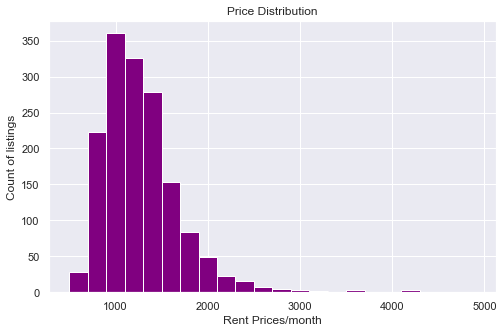

In [71]:
## Price Distribution for the dataset
plt.figure(figsize=(8,5))
plt.hist(apartments['price'],bins =range(500,5000,200),color='purple') 
plt.xlabel('Rent Prices/month')
plt.ylabel('Count of listings')
plt.title('Price Distribution')
plt.show()

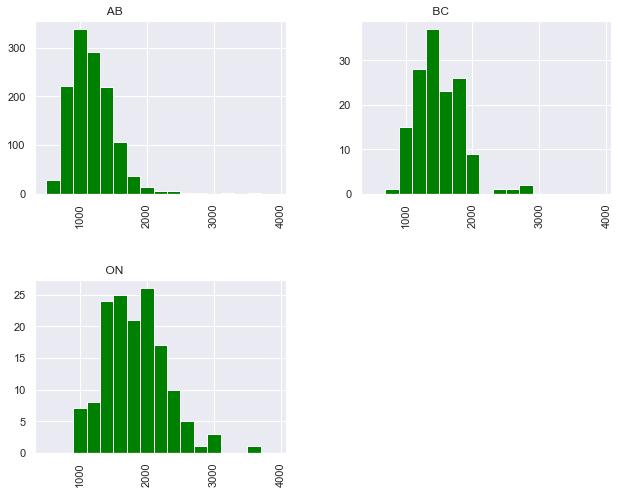

In [72]:
## Histogram of prices for each province
apartments['price'].hist(by=apartments['province'],color='green',bins =range(500,4000,200),figsize=(10,8))
plt.show()

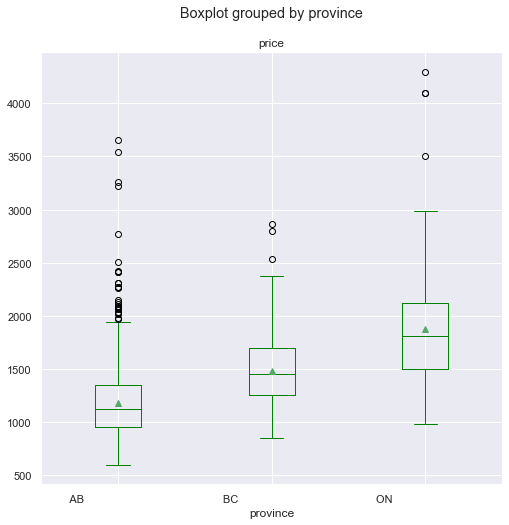

In [73]:
##Boxplot for each province 
apartments.boxplot(column='price', by='province',color= "green", figsize=(8,8), showmeans=True)
plt.show()
## The ouliers in the plot below can be attributed to the natural variations in the provinces. That is, the cities in each province have their own unique characteristics which may cause the disparity in prices

In [76]:
## A pivot table for the average rent prices for 0-3 bedroom apartments in each province
pivot1 = pd.pivot_table(apartments,
                       index=["province"],
                       columns ='bedroom',
                       values='price',
                       aggfunc = 'mean')
pivot1

bedroom,0.0,1.0,2.0,3.0
province,,,,
AB,882.786517,1067.613924,1285.652720,1533.129496
BC,1046.944444,1401.557377,1593.260870,1876.666667
ON,1245.500000,1600.820000,2019.190476,2254.785714


In [77]:
table1 = apartments.groupby(['province','bedroom'], as_index=False)['price'].mean()
plt.figure(figsize=(1,1))
fig=px.histogram(data_frame=pivot2, x='province',y ='price', color='bedroom', barmode="group",text_auto=True,color_discrete_map={
                "0.0": "gold",
                "1.0": "bronze",
                "2.0": "blue",
                "3.0": "goldenrod"})

fig.update_layout(
    title='AVERAGE RENT PRICES FOR 0-3 BEDROOM APARTMENTS',
    xaxis_title='PROVINCE',
    yaxis_title='AVERAGE RENT PRICE',
    legend_title='BEDROOM SIZE',
    paper_bgcolor="rgba(0,0,0,0)",  ## Sets the background to white
    plot_bgcolor="rgba(0,0,0,0)",   ## Sets the background of the plot to white/clear
    font_size=13,
)
fig.show()

<Figure size 72x72 with 0 Axes>

In [51]:
py.plot(fig, filename="housing affordability study", auto_open=True) ## This saves the plot to your account and can be retrieved online

'https://plotly.com/~janice.gbedemah/1/'